<a href="https://colab.research.google.com/github/Vijaypurushoth988373/DW12_task_6/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
train_data = pd.read_csv('/content/train.csv')
train_data.head(5)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [ ]:
train_data=train_data.drop(columns='ID',axis=1)

In [ ]:
train_data.shape

(387, 14)

In [ ]:
test_data = pd.read_csv('/content/test.csv')
test_data.head(5)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [ ]:
test_data.shape

(105, 14)

In [ ]:
# Let's summarize the data to see the distribution of data
train_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.00000,387.000000,387.000000
mean,3.795259,10.550388,10.961395,0.062016,0.552720,6.251222,67.896641,3.854731,9.428941,403.989664,18.525840,358.63907,12.937700,21.551163
std,9.286833,22.073961,6.808364,0.241496,0.116176,0.653908,28.398327,2.137822,8.669641,168.964094,2.088484,88.03231,7.160259,7.840493
min,0.009060,0.000000,0.740000,0.000000,0.385000,4.138000,2.900000,1.137000,1.000000,187.000000,12.600000,0.32000,2.470000,5.000000
25%,0.078855,0.000000,5.130000,0.000000,0.449000,5.875500,42.350000,2.115300,4.000000,277.000000,17.400000,376.09000,7.300000,16.750000
50%,0.229270,0.000000,8.560000,0.000000,0.532000,6.182000,76.700000,3.331700,5.000000,329.000000,19.000000,391.93000,11.380000,20.700000
75%,3.504645,12.500000,18.100000,0.000000,0.624000,6.591500,93.700000,5.222850,24.000000,666.000000,20.200000,396.90000,17.095000,24.500000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.90000,37.970000,48.800000


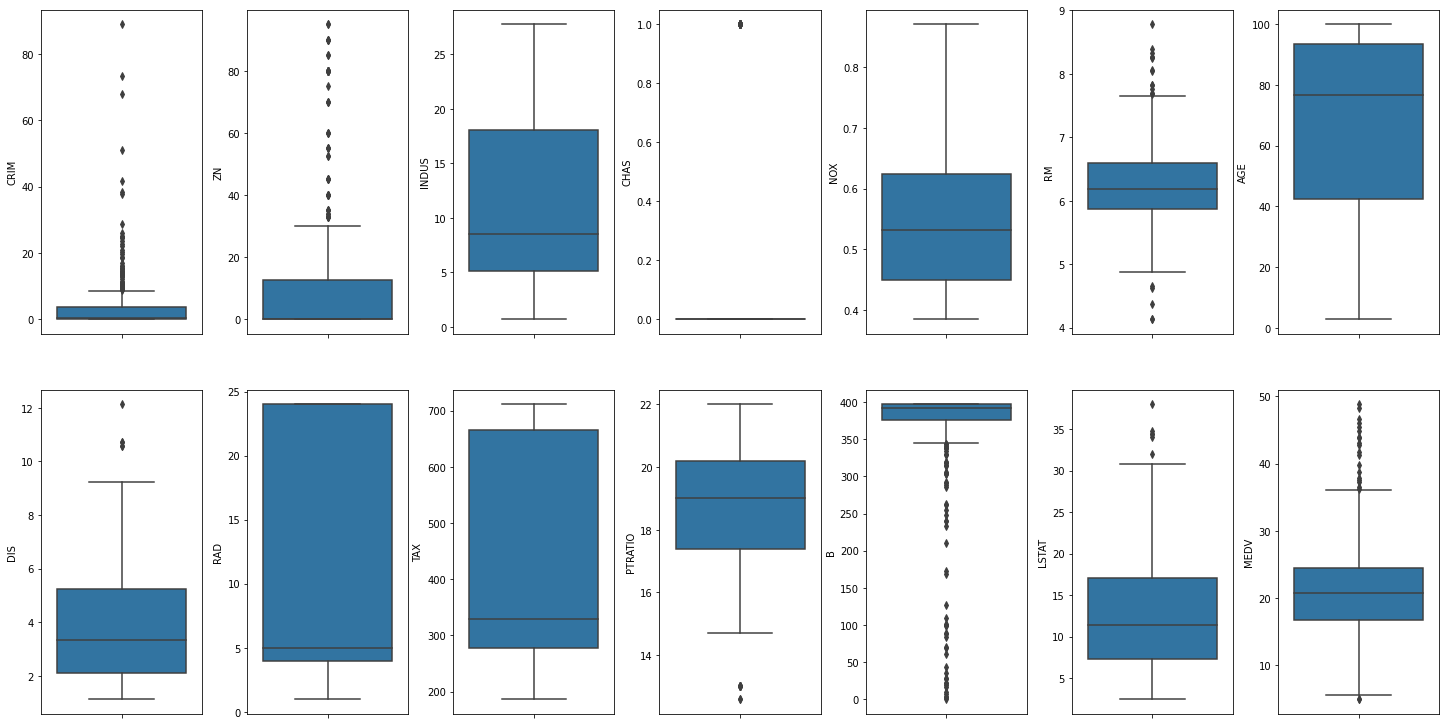

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in train_data.items():
    sns.boxplot(y=k, data=train_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
 for k, v in train_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(train_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.70%
Column ZN outliers = 12.66%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.65%
Column AGE outliers = 0.00%
Column DIS outliers = 1.29%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.84%
Column B outliers = 14.73%
Column LSTAT outliers = 1.55%
Column MEDV outliers = 5.43%


In [ ]:
train_data = train_data[~(train_data['MEDV'] >= 50.0)]
print(np.shape(train_data))

(387, 14)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

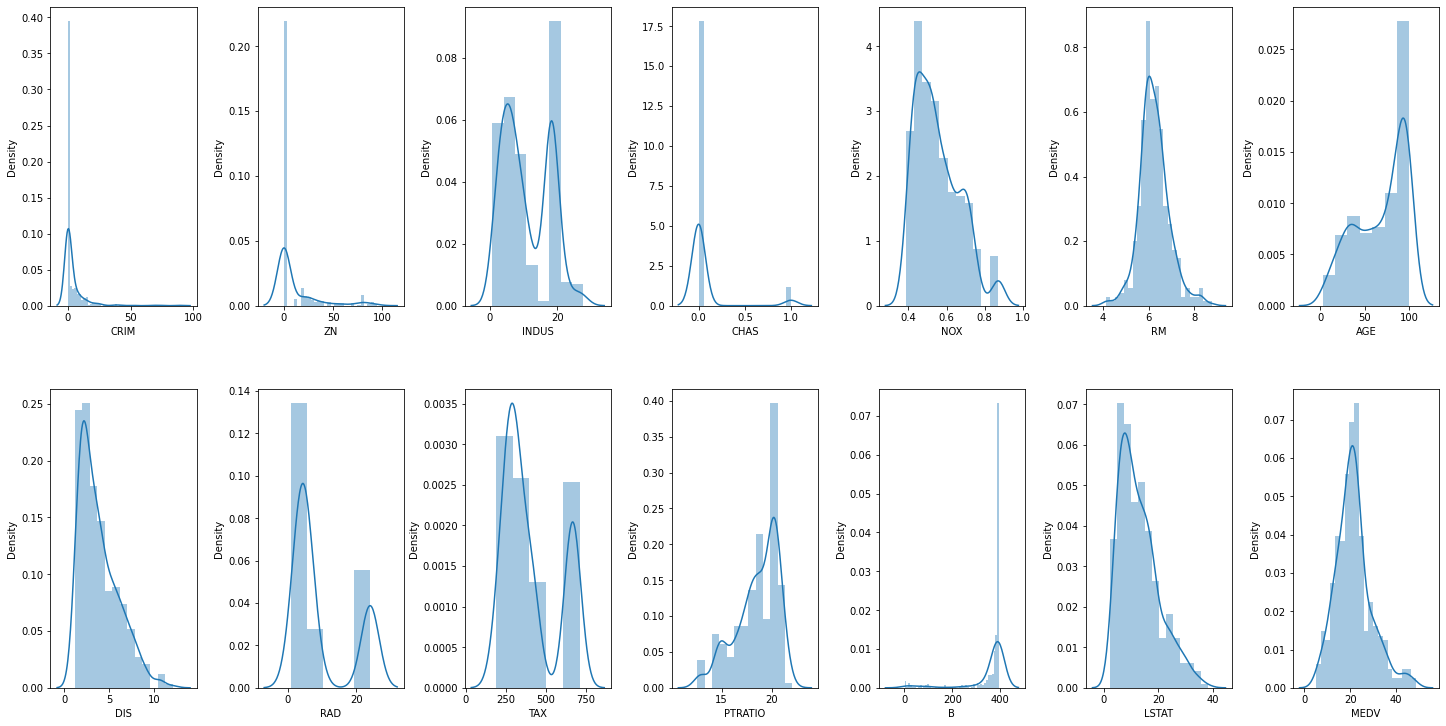

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in train_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

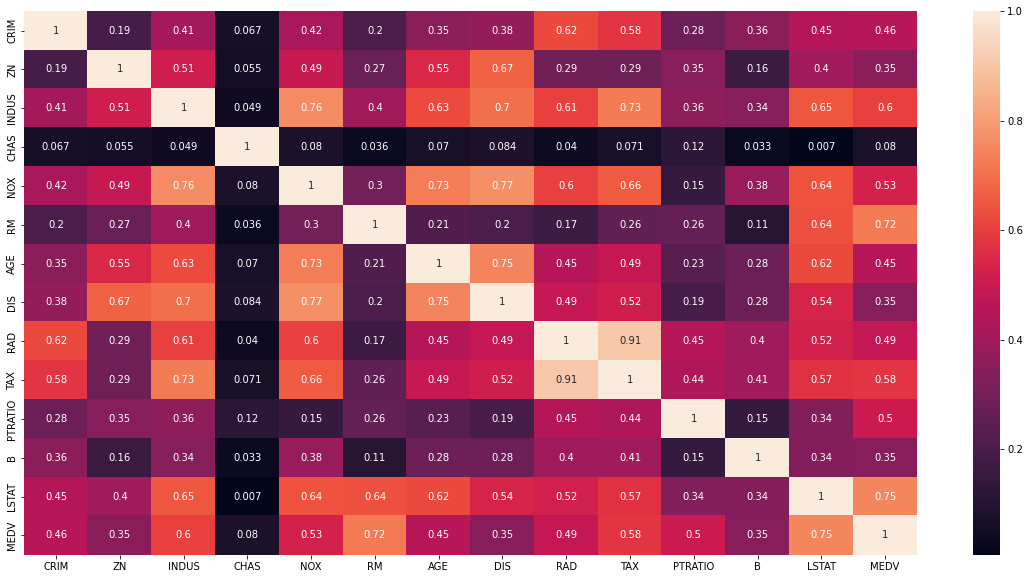

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr().abs(),  annot=True)

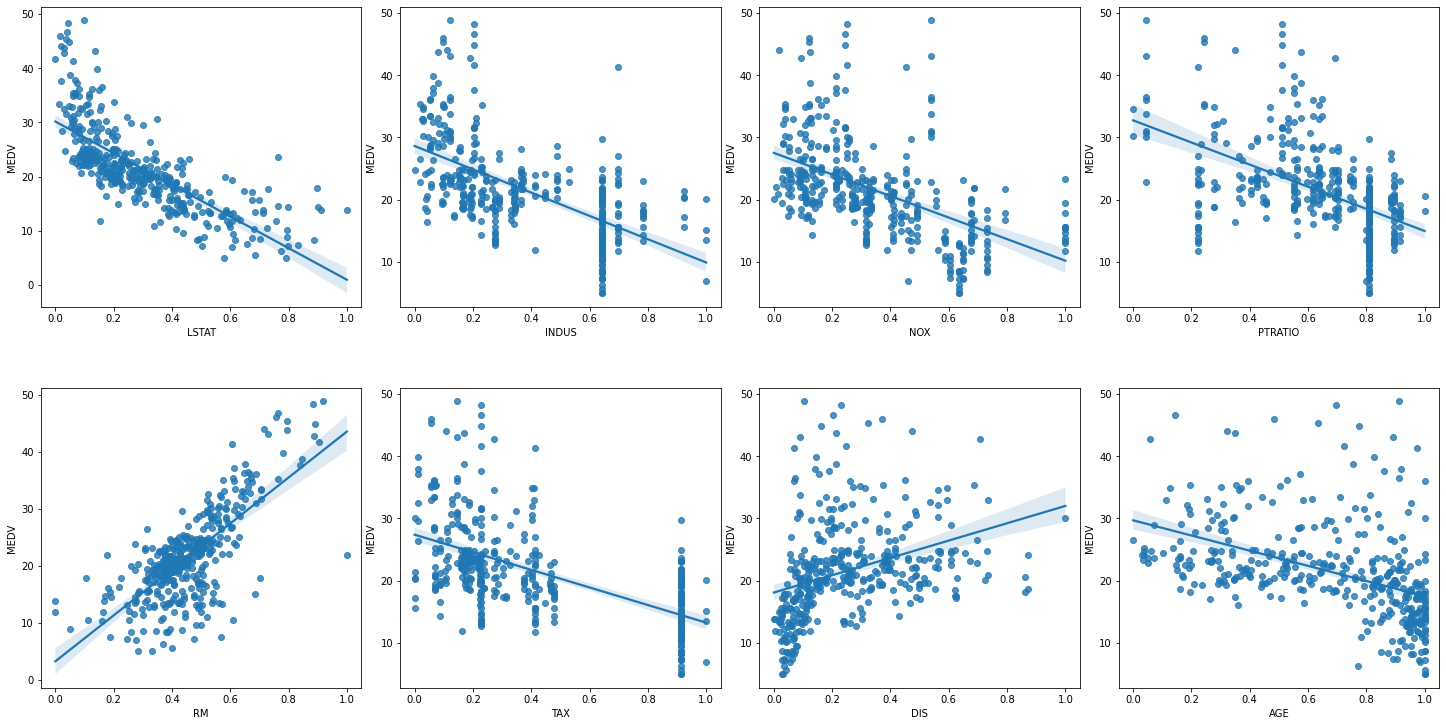

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = train_data.loc[:,column_sels]
y = train_data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)